In [4]:
import matplotlib.pyplot as plt
import networkx as nx

In [423]:
def parse(string):
    reG = nx.MultiDiGraph()
    node = 0
    edge_labels = dict()
    n=len(string)
    or_=False
    for i, token in enumerate(string):
        next_node = node+1
        if token == "+":
            continue
        elif token ==  "*":
            continue
        elif token ==  "|":
            continue 
        else:
            if i+1<n and (string[i+1] != "+" and string[i+1] != "*") and string[i+1] == "|":
                reG.add_edge(node, next_node)
                edge_labels[(node, next_node)] = [token]
                or_ = True
                or_node = next_node
                continue
            elif i+2<n and string[i+1] == "+"  and string[i+2] == "|":
                reG.add_edge(node, next_node)
                edge_labels[(node, next_node)] = token
                reG.add_edge(next_node, next_node)
                edge_labels[(next_node, next_node)] = token
                or_ = True
                or_node = node+2
            elif i+2<n and string[i+1] == "*"  and string[i+2] == "|":
                reG.add_edge(node, node)
                edge_labels[(node, node)] = token
                or_ = True
                or_node = node+1
                next_node=or_node
            if i+1<n and string[i+1] == "+" and string[i+1] != "|":
                reG.add_edge(node, next_node)
                edge_labels[(node, next_node)] = token
                reG.add_edge(next_node, next_node)
                edge_labels[(next_node, next_node)] = token
                node+=1
            elif i+1<n and string[i+1] == "*" and string[i+1] != "|":
                reG.add_edge(node, node)
                edge_labels[(node, node)] = token
            elif or_:
                next_node = or_node
                reG.add_edge(node, next_node)
                edge_labels[(node, next_node)].append(token)
                or_ = False
                node+=1
            elif not or_:
                next_node = node+1
                reG.add_edge(node, next_node)
                edge_labels[(node, next_node)] = token
                node+=1
    return reG, edge_labels



def irregex(string):
    if "|" in string:
        return parse(string)
    else:
        return parse(string)


In [455]:
def is_path_valid(graph, string, end_node, start_node=0):
    def neighbors(current_node, index):
        if index == len(string) and current_node == end_node:
            return True
        for neighbor in graph[current_node]:
            label = edge_labels.get((current_node, neighbor))   
            try:
                if label and (label == string[index] or string[index] in label):
                    if neighbors(neighbor, index + 1):
                        return True
            except:
                return False
        return False
    return neighbors(start_node, 0)


In [524]:
reg = "a|bcd"

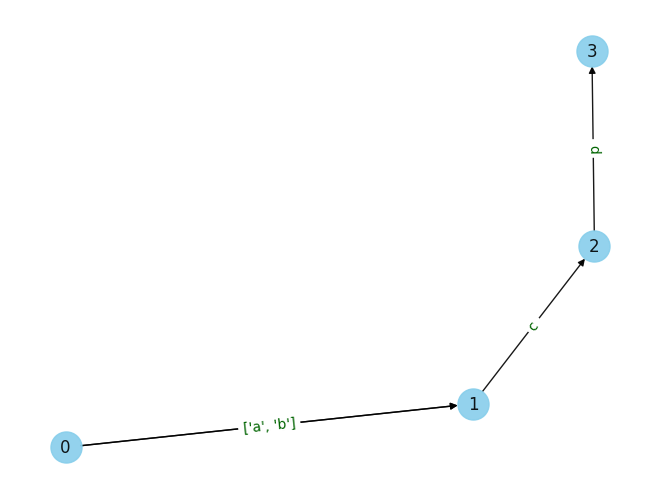

In [529]:
G, edge_labels = irregex(reg)

pos = nx.spring_layout(G)
plt.figure()
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='skyblue', alpha=0.9,
    labels={node: node for node in G.nodes()}
)
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color='darkgreen')

plt.axis('off')
plt.show()

In [534]:
end_node = max(list(max(edge_labels)))

test = "acd"
result = is_path_valid(G, test, end_node)
print(f'Строка "{test}" под регулярку {reg} {"подходит" if result else "НЕ подходит"}')
test = "bcd"
result = is_path_valid(G, test, end_node)
print(f'Строка "{test}" под регулярку {reg} {"подходит" if result else "НЕ подходит"}')
test = "abcd"
result = is_path_valid(G, test, end_node)
print(f'Строка "{test}" под регулярку {reg} {"подходит" if result else "НЕ подходит"}')
test = "a"
result = is_path_valid(G, test, end_node)
print(f'Строка "{test}" под регулярку {reg} {"подходит" if result else "НЕ подходит"}')

Строка "acd" под регулярку a|bcd подходит
Строка "bcd" под регулярку a|bcd подходит
Строка "abcd" под регулярку a|bcd НЕ подходит
Строка "a" под регулярку a|bcd НЕ подходит


In [458]:
reg = "bba*b+"

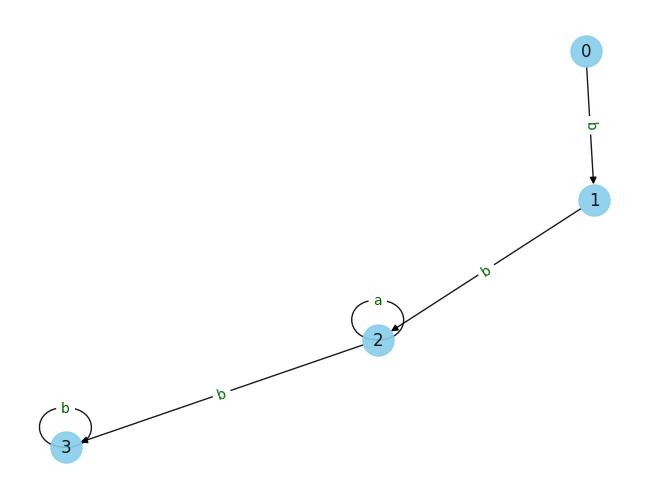

In [459]:
G, edge_labels = irregex(reg)

pos = nx.spring_layout(G)
plt.figure()
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='skyblue', alpha=0.9,
    labels={node: node for node in G.nodes()}
)
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color='darkgreen')

plt.axis('off')
plt.show()

In [460]:
end_node = max(list(max(edge_labels)))

test = "bbbbb"
result = is_path_valid(G, test, end_node)
print(f'Строка "{test}" под регулярку {reg} {"подходит" if result else "НЕ подходит"}')
test = "baaaaabbbb"
result = is_path_valid(G, test, end_node)
print(f'Строка "{test}" под регулярку {reg} {"подходит" if result else "НЕ подходит"}')
test = "bbaaaaaabbbbbbb"
result = is_path_valid(G, test, end_node)
print(f'Строка "{test}" под регулярку {reg} {"подходит" if result else "НЕ подходит"}')
test = "bbaaaaaaa"
result = is_path_valid(G, test, end_node)
print(f'Строка "{test}" под регулярку {reg} {"подходит" if result else "НЕ подходит"}')

Строка "bbbbb" под регулярку bba*b+ подходит
Строка "baaaaabbbb" под регулярку bba*b+ НЕ подходит
Строка "bbaaaaaabbbbbbb" под регулярку bba*b+ подходит
Строка "bbaaaaaaa" под регулярку bba*b+ НЕ подходит


In [461]:
reg = "ab|a"

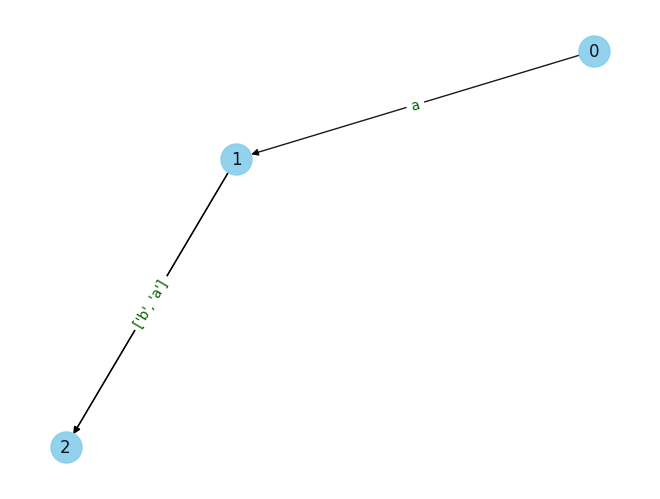

In [462]:
G, edge_labels = irregex(reg)

pos = nx.spring_layout(G)
plt.figure()
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='skyblue', alpha=0.9,
    labels={node: node for node in G.nodes()}
)
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color='darkgreen')

plt.axis('off')
plt.show()

In [467]:
end_node = max(list(max(edge_labels)))

test = "ab"
result = is_path_valid(G, test, end_node)
print(f'Строка "{test}" под регулярку {reg} {"подходит" if result else "НЕ подходит"}')
test = "aa"
result = is_path_valid(G, test, end_node)
print(f'Строка "{test}" под регулярку {reg} {"подходит" if result else "НЕ подходит"}')
test = "a"
result = is_path_valid(G, test, end_node)
print(f'Строка "{test}" под регулярку {reg} {"подходит" if result else "НЕ подходит"}')

Строка "ab" под регулярку ab|a подходит
Строка "aa" под регулярку ab|a подходит
Строка "a" под регулярку ab|a НЕ подходит


In [518]:
reg = "ab+a+"

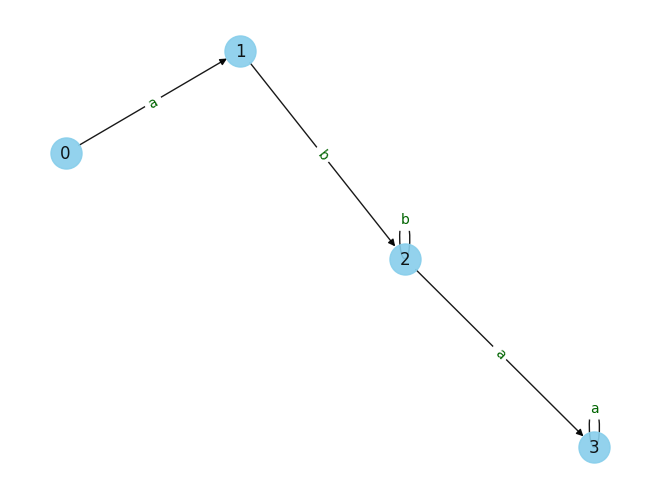

In [520]:
G, edge_labels = irregex(reg)

pos = nx.spring_layout(G)
plt.figure()
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='skyblue', alpha=0.9,
    labels={node: node for node in G.nodes()}
)
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color='darkgreen'
)
plt.axis('off')
plt.show()

In [523]:
end_node = max(list(max(edge_labels)))

test = "abba"
result = is_path_valid(G, test, end_node)
print(f'Строка "{test}" под регулярку {reg} {"подходит" if result else "НЕ подходит"}')
test = "aa"
result = is_path_valid(G, test, end_node)
print(f'Строка "{test}" под регулярку {reg} {"подходит" if result else "НЕ подходит"}')
test = "abbaaaaaaaaa"
result = is_path_valid(G, test, end_node)
print(f'Строка "{test}" под регулярку {reg} {"подходит" if result else "НЕ подходит"}')

Строка "abba" под регулярку ab+a+ подходит
Строка "aa" под регулярку ab+a+ НЕ подходит
Строка "abbaaaaaaaaa" под регулярку ab+a+ подходит
